# Preproccessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!kaggle datasets download -d gaurav2022/mobile-health
!unzip mobile-health.zip

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
 90% 32.0M/35.5M [00:00<00:00, 81.0MB/s]
100% 35.5M/35.5M [00:00<00:00, 82.2MB/s]
Archive:  mobile-health.zip
  inflating: mhealth_raw_data.csv    


In [3]:
data = pd.read_csv("mhealth_raw_data.csv")
data.shape

(1215745, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [5]:
# There is no duplicates
data.duplicated().sum()

0

In [6]:
# Checking for classes if they balanced or not
data['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [7]:
class_counts = data['Activity'].value_counts()
min_count = class_counts.min()

undersampled_data = (data[data['Activity'] == c].sample(min_count, random_state=42) for c in class_counts.index)
undersampled_data = pd.concat(undersampled_data, ignore_index=True)

X_undersampled = undersampled_data.drop(['Activity', 'subject'], axis=1)
y_undersampled = undersampled_data['Activity']

In [8]:
y_undersampled.value_counts()

Activity
0     10342
1     10342
2     10342
3     10342
4     10342
9     10342
10    10342
11    10342
5     10342
7     10342
8     10342
6     10342
12    10342
Name: count, dtype: int64

In [9]:
X_undersampled

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.061600,0.14655
1,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.765910,0.85129
2,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.997950,0.52155
3,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.710470,0.90086
4,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.145800,0.81897
...,...,...,...,...,...,...,...,...,...,...,...,...
134441,4.21450,-3.1419,-9.24000,0.39147,-0.89493,0.013752,-20.8850,-18.81200,-8.24270,-0.856860,-0.375770,0.56897
134442,5.36410,-6.1145,-8.48130,0.53432,-0.81051,-0.007858,-21.1400,-18.69800,-0.77864,-0.694120,-0.710470,0.47629
134443,0.70801,-19.3040,-4.62480,0.48237,-0.82739,0.080550,-2.4445,-1.29750,-1.75240,-0.956860,-0.207390,0.48491
134444,0.20464,-2.3600,-3.32430,0.72913,-0.56098,-0.392930,3.7371,0.66210,-2.78980,-0.547060,0.289530,0.93966


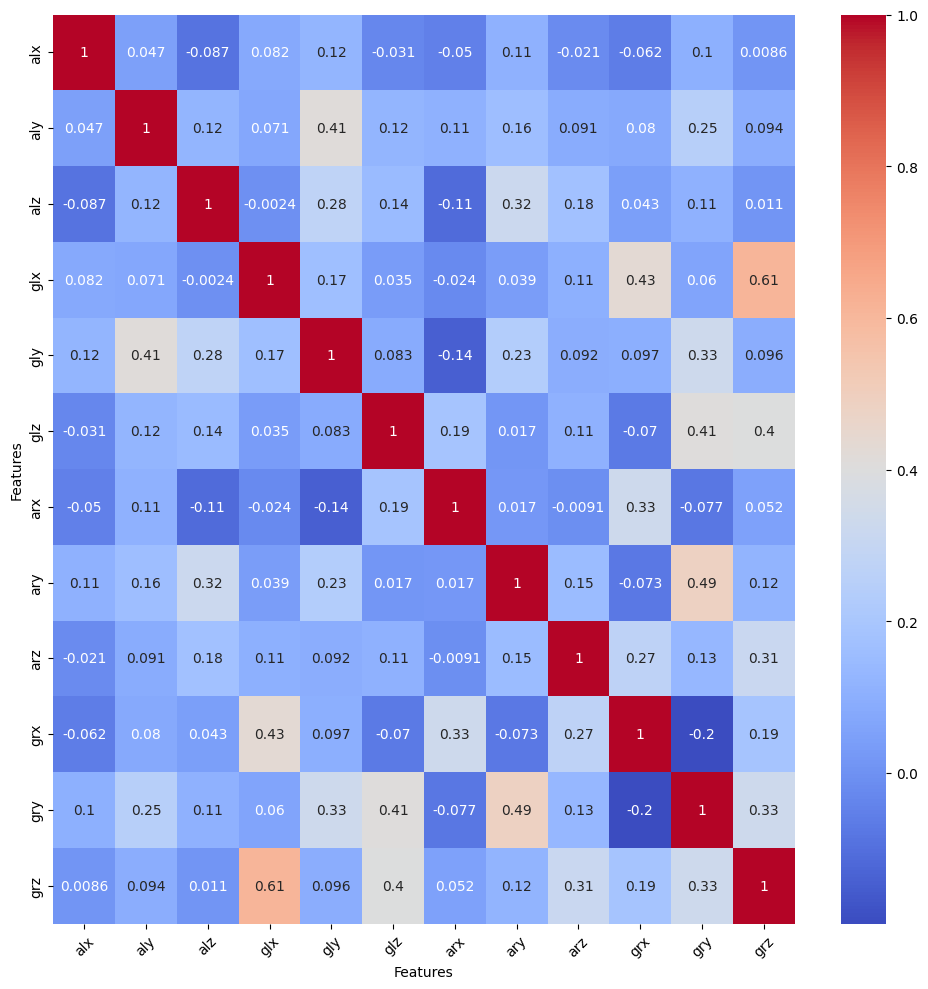

In [10]:
import seaborn as sns

features = X_undersampled.columns
correlation_matrix = X_undersampled[features].corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

ax.set_xlabel("Features")
ax.set_ylabel("Features")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalization
scaler = StandardScaler()
scaler.fit(X_undersampled)
X_undersampled = scaler.transform(X_undersampled)

X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42, shuffle=True)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (107556, 12)
y_train shape: (107556,)
X_test shape: (26890, 12)
y_test shape: (26890,)


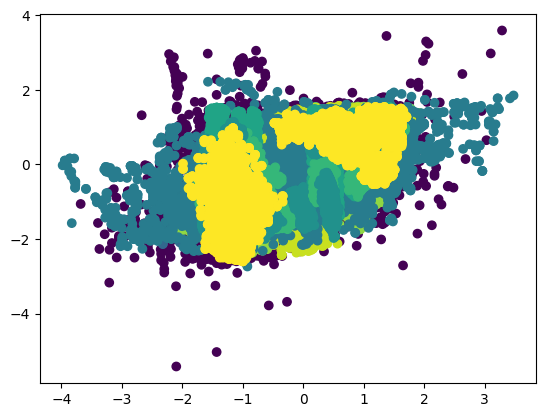

In [12]:
plt.scatter(X_undersampled[:, 3], X_undersampled[:, 11], c = y_undersampled)

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Try running from k = 1 through 10 and record testing accuracy
k_range = range(1, 11)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn. fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

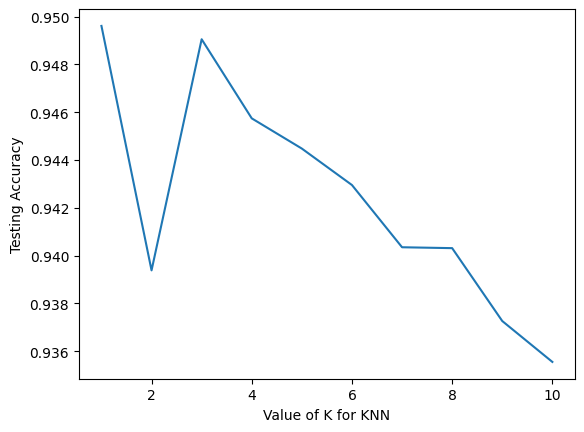

In [14]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy' )

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# It seems that the most accuract K is 3
knn = KNeighborsClassifier(n_neighbors = 3)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy Scores:", scores)
print("Average Cross-validation Accuracy:", scores.mean())

Cross-validation Accuracy Scores: [0.94895872 0.94523987 0.94858684 0.94458907 0.94877278 0.94551878
 0.94886099 0.94402603 0.94774523 0.94384007]
Average Cross-validation Accuracy: 0.9466138385304802


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
cm = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1-score:", f1)
print("Test Set Confusion Matrix: \n", cm)

Test Set Accuracy: 0.9490516920788398
Test Set Precision: 0.9490516920788398
Test Set Recall: 0.9490516920788398
Test Set F1-score: 0.9490516920788398
Test Set Confusion Matrix: 
 [[1289   45   42   22  148   82   73   93   99   84   30   20   51]
 [   1 2034    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0 2089    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2105    0    0    0    0    0    0    0    0    0]
 [  10    0    0    0 2075    0    1    0    1    0    0    0    1]
 [  24    0    0    0   37 1958    4    0   22    1    1    0    1]
 [   3    3    0    0    0    0 1968    8    4    0    0    0    0]
 [   3    0    0    0    0    0    4 2059    5    1    0    0    0]
 [   2    0    0    0    0    0    8    6 2076    0    0    0    0]
 [   4    0    0    0    0    0    0    0    1 2022    0    0    1]
 [  10    0    0    0    4    1    0    2    1    1 2002   59   17]
 [  17    0    0    0   12    0    0    0    0    1   89 1983   18]
 [  

# SVM

Best C value: 100.0
Best Cross-Validation Accuracy: 0.9535497867493632


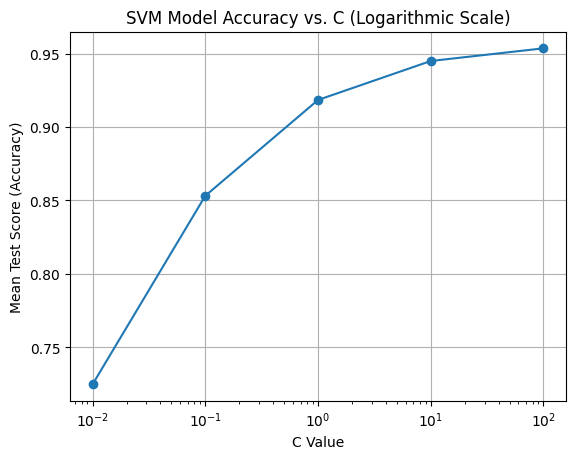

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


C_range = np.logspace(-2, 2, 5)
param_grid = {'C': C_range}

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best C value:", best_params['C'])
print("Best Cross-Validation Accuracy:", best_score)

cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
C_values = cv_results['param_C']

plt.plot(C_values, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('C Value')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('SVM Model Accuracy vs. C (Logarithmic Scale)')
plt.xscale('log')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# The best C is 100
svm = SVC(C= 100, kernel='rbf')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svm, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation Accuracy Scores for RBF kernel:", scores)
print(f"Average Cross-validation Accuracy for RBF kernel:", scores.mean())


svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
f1 = metrics.f1_score(y_test, y_pred, average='micro')
cm = metrics.confusion_matrix(y_test, y_pred)

print(f"Test Set Accuracy for RBF kernel:", accuracy)
print(f"Test Set Precision for RBF kernel:", precision)
print(f"Test Set Recall for RBF kernel:", recall)
print(f"Test Set F1-score for RBF kernel:", f1)
print(f"Test Set Confusion Matrix for RBF kernel: \n", cm)


Cross-validation Accuracy Scores for RBF kernel: [0.95277055 0.95314243 0.95230569 0.95342135 0.95444403 0.95295649
 0.95388192 0.95425384 0.9539749  0.9521153 ]
Average Cross-validation Accuracy for RBF kernel: 0.9533266476937655
Test Set Accuracy for RBF kernel: 0.9534399404983265
Test Set Precision for RBF kernel: 0.9534399404983265
Test Set Recall for RBF kernel: 0.9534399404983265
Test Set F1-score for RBF kernel: 0.9534399404983265
Test Set Confusion Matrix for RBF kernel: 
 [[1367   62   42   26  109   79   73   61   93   65   24   19   58]
 [   1 2034    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2090    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2105    0    0    0    0    0    0    0    0    0]
 [  25    0    0    0 2056    3    1    0    3    0    0    0    0]
 [  86    0    0    0   25 1928    3    0    4    0    0    0    2]
 [   8    4    0    0    0    0 1963   11    0    0    0    0    0]
 [   3    0    0    0    0    0   17 2

# Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix

In [17]:
def create_model(input_dim):
  model = Sequential()
  model.add(Dense(units=128, activation='relu', input_dim=input_dim))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

  return model

In [18]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

input_dim = X_train.shape[1]
model = create_model(input_dim)

history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
2689/2689 [==============================] - 11s 3ms/step - loss: 0.6956 - accuracy: 0.7763 - val_loss: 0.4570 - val_accuracy: 0.8529
Epoch 2/20
2689/2689 [==============================] - 13s 5ms/step - loss: 0.3841 - accuracy: 0.8791 - val_loss: 0.3499 - val_accuracy: 0.8928
Epoch 3/20
2689/2689 [==============================] - 15s 5ms/step - loss: 0.3165 - accuracy: 0.9018 - val_loss: 0.3004 - val_accuracy: 0.9073
Epoch 4/20
2689/2689 [==============================] - 16s 6ms/step - loss: 0.2820 - accuracy: 0.9125 - val_loss: 0.2922 - val_accuracy: 0.9106
Epoch 5/20
2689/2689 [==============================] - 15s 6ms/step - loss: 0.2626 - accuracy: 0.9191 - val_loss: 0.2692 - val_accuracy: 0.9182
Epoch 6/20
2689/2689 [==============================] - 10s 4ms/step - loss: 0.2459 - accuracy: 0.9244 - val_loss: 0.2616 - val_accuracy: 0.9217
Epoch 7/20
2689/2689 [==============================] - 14s 5ms/step - loss: 0.2353 - accuracy: 0.9285 - val_loss: 0.2491 - val_ac

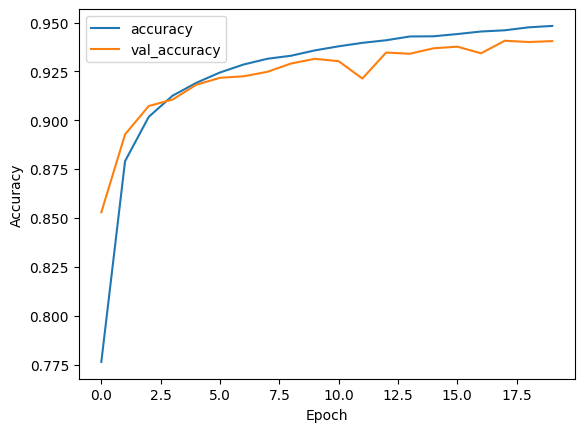

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
precision = precision_score(np.argmax(y_test_encoded, axis=1), y_pred, average='micro')
recall = recall_score(np.argmax(y_test_encoded, axis=1), y_pred, average='micro')
f1 = f1_score(np.argmax(y_test_encoded, axis=1), y_pred, average='micro')
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1-score:", f1)
print("Test Set Confusion Matrix: \n", cm)

Test Accuracy: 0.9435
841/841 [==============================] - 2s 2ms/step
Test Set Accuracy: 0.9434734101896616
Test Set Precision: 0.9434734101896616
Test Set Recall: 0.9434734101896616
Test Set F1-score: 0.9434734101896616
Test Set Confusion Matrix: 
 [[1246   63   45   32  107  109   63   70  112   84   44   33   70]
 [   0 2034    0    0    0    0    1    0    0    0    0    0    0]
 [   0    0 2090    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2105    0    0    0    0    0    0    0    0    0]
 [  29    0    0    0 2042    9    4    0    3    0    1    0    0]
 [  72    0    0    0   38 1896    4    0   27    1    3    3    4]
 [   8    4    0    0    0    1 1956   12    4    0    0    0    1]
 [   8    0    0    0    0    2   14 2041    5    1    0    0    1]
 [  11    0    0    0    2    1    5   11 2060    0    0    0    2]
 [  12    0    0    0    0    1    0    0    2 2008    4    0    1]
 [   8    0    0    0    0    0    0    0    0    1 1996   80  

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)

logreg_ovr.fit(X_train, y_train)
y_pred = logreg_ovr.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
cm = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1-score:", f1)
print("Test Set Confusion Matrix: \n", cm)

Test Set Accuracy: 0.5386017106731127
Test Set Precision: 0.5386017106731127
Test Set Recall: 0.5386017106731127
Test Set F1-score: 0.5386017106731127
Test Set Confusion Matrix: 
 [[  56  240  147   39  215   75  264  208  259  195  133  127  120]
 [   0 1241    0    0  381    0  413    0    0    0    0    0    0]
 [ 219    0  825    0    0  218    0  397    0  208    0  223    0]
 [   0    0    0 2105    0    0    0    0    0    0    0    0    0]
 [  29  234   10    0 1095  127  160    1  308    1    1   59   63]
 [ 110  165   29   12  372  600  181   65  326   53   11   22  102]
 [  72  304    0    0   63    0 1314   14  212    1    0    0    6]
 [  43  206  189   34   82    0  158 1122   25  169    0   28   16]
 [  30   96    0    0  119  199  422    1 1090    1   29    4  101]
 [   2    0    3    0    9    1    4   25  142 1838    0    2    2]
 [   7    1   78    4   14   33   11   28   14   10 1214  376  307]
 [  29    5  208    7   34   88   47   54   47   15  146 1332  108]
 [  

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 10.68860940592738
Root Mean Squared Error (RMSE): 3.2693438800357755
